In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

### After importing the necessary libraries, importing dataset itself

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Exploratory data analysis

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### With help of 'info', we can check the general information about our dataset

In [5]:
iris.isnull().sum().sum()

0

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
corr_grid = iris.corr()
corr_grid

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### With heatmap, we can see the details visually and understand them better

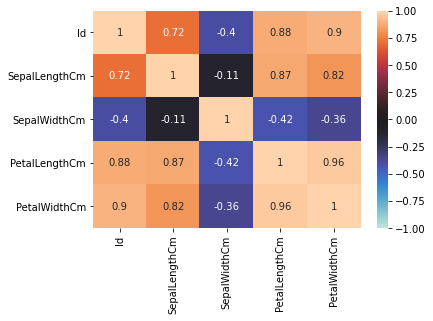

In [8]:
sns.heatmap(corr_grid,vmin=-1,center=0,vmax=1, annot = True)
plt.show()

In [9]:
iris.shape

(150, 6)

### Lowering the columns help us to work with dataset easier

In [10]:
cols = iris.columns
iris.columns = [col.lower() for col in cols]

iris.rename(columns={'SepalLengthCm' : 'sepallengthcm', 
                    'SepalWidthCm' : 'sepalwidthcm',
                    'PetalLengthCm': 'petallengthcm',
                    'PetalWidthCm': 'petalwidthcm'},
                   inplace=True)

iris.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Using sns countplot, we can see the relations between columns

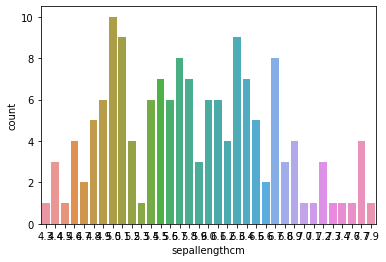

In [11]:
sns.countplot('sepallengthcm',data=iris) # Count Plot of sepallengthcm

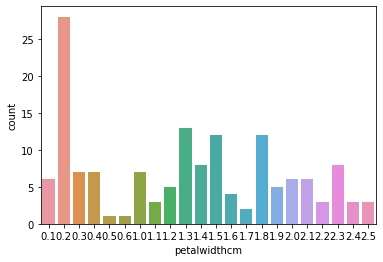

In [12]:
sns.countplot('petalwidthcm',data=iris)

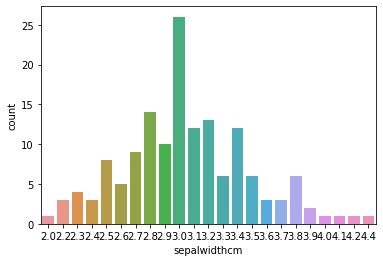

In [13]:
sns.countplot('sepalwidthcm',data=iris)

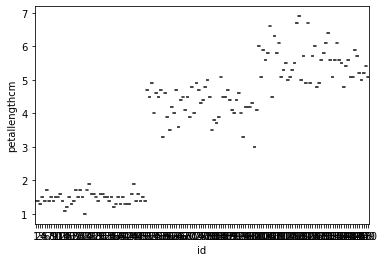

In [14]:
sns.boxplot('id','petallengthcm',data=iris)

Text(0.5, 1.0, 'sepalwidthcm')

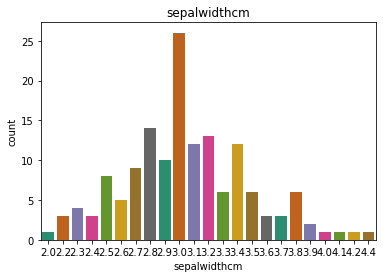

In [15]:
sns.countplot(x='sepalwidthcm',data=iris,palette='Dark2').set_title('sepalwidthcm')

Text(0.5, 1.0, 'sepalwidthcm')

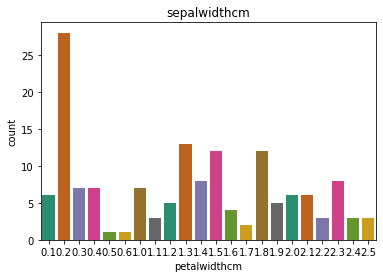

In [16]:
sns.countplot(x='petalwidthcm',data=iris,palette='Dark2').set_title('sepalwidthcm')

### From now on, we can start building our model

In [17]:
X = iris.iloc[:, [1, 2]].values

In [18]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [19]:
fig = plt.figure(figsize =(10,5))

<Figure size 720x360 with 0 Axes>

### Scatter plot below, shows the relations between 'sepalwidthcm and sepallengthcm' and how close they are to each other

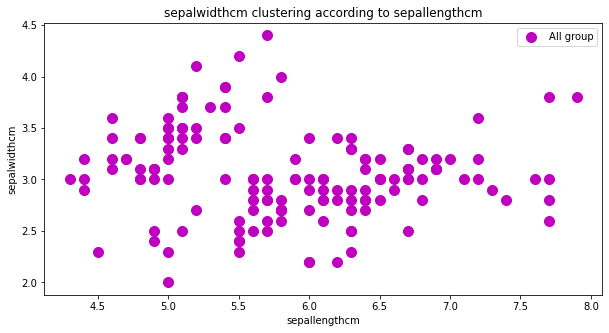

In [20]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100,c='m',label='All group')
plt.title('sepalwidthcm clustering according to sepallengthcm')
plt.xlabel('sepallengthcm')
plt.ylabel('sepalwidthcm')
plt.legend()
plt.show()

### Elbow method

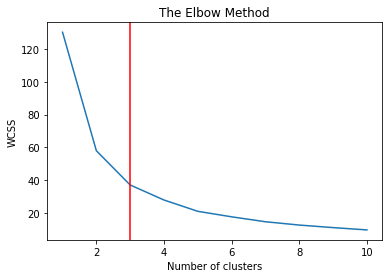

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1, 11), wcss)
plt.axvline(3,color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Above, we can see the Elbow method showing the optimal number of clusters

### Silhouete_methode

In [22]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4635854719215507
For n_clusters = 3 The average silhouette_score is : 0.4434693231245126
For n_clusters = 4 The average silhouette_score is : 0.42155567170330127
For n_clusters = 5 The average silhouette_score is : 0.4031886844477292
For n_clusters = 6 The average silhouette_score is : 0.3847290121788143
For n_clusters = 7 The average silhouette_score is : 0.40046163002994506
For n_clusters = 8 The average silhouette_score is : 0.39387278874174975


### Silhouete_method shows the changes according to number of clusters

In [23]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [24]:
y_kmeans

array([2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 1, 3, 1, 0, 3, 0, 3, 4, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 1, 3, 3, 1, 4, 1, 3, 1,
       3, 3, 3, 0, 0, 3, 3, 1, 1, 0, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 0, 1, 3, 3, 3, 1, 3, 1, 0, 3, 3, 3, 3, 3, 3, 0])

In [25]:
kmeans.cluster_centers_

array([[5.65428571, 2.63714286],
       [7.31176471, 3.12941176],
       [5.25555556, 3.67037037],
       [6.39565217, 2.97391304],
       [4.728     , 3.068     ]])

In [26]:
kmeans.inertia_

21.07710165496151

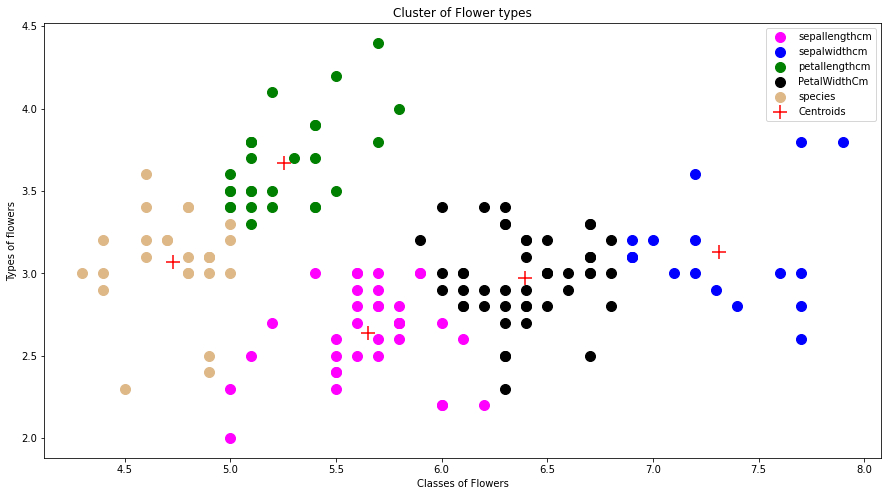

In [27]:
#Lets plot those clusters!
# change names and centroids
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='sepallengthcm')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='sepalwidthcm')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='petallengthcm')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='black',label='PetalWidthCm')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='species')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids',marker = "+")
plt.title('Cluster of Flower types')
plt.xlabel('Classes of Flowers')
plt.ylabel('Types of flowers')
plt.legend()
plt.show()

## Hierarchical

In [28]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

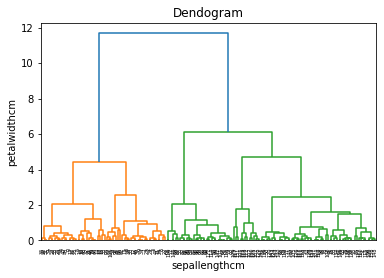

In [29]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('sepallengthcm')
plt.ylabel('petalwidthcm')
plt.show()

### Above, we used dendrogram to see the best allocate objects to square

### Fitting Hierarchical clustering to data

In [30]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [31]:
y_hc

array([4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 0, 0, 4,
       4, 0, 4, 0, 4, 4, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 3, 1, 1, 3, 0, 3, 1, 3,
       1, 1, 1, 2, 2, 1, 1, 3, 3, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int64)

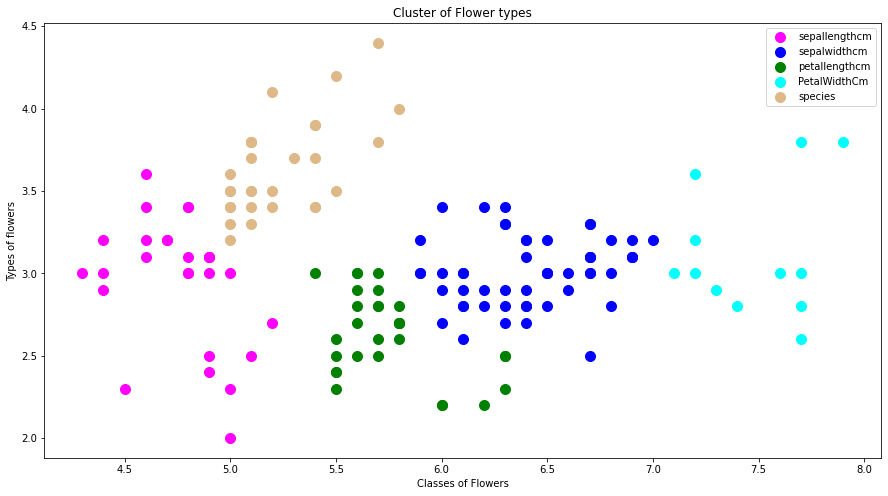

In [32]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='magenta',label='sepallengthcm')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='sepalwidthcm')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='petallengthcm')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='PetalWidthCm')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='burlywood',label='species')
plt.title('Cluster of Flower types')
plt.xlabel('Classes of Flowers')
plt.ylabel('Types of flowers')
plt.legend()
plt.ioff()
plt.show()

In [33]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.4635854719215507
For n_clusters = 3 The average silhouette_score is : 0.4434693231245126
For n_clusters = 4 The average silhouette_score is : 0.42155567170330127
For n_clusters = 5 The average silhouette_score is : 0.4031886844477292
For n_clusters = 6 The average silhouette_score is : 0.3847290121788143
For n_clusters = 7 The average silhouette_score is : 0.40046163002994506
For n_clusters = 8 The average silhouette_score is : 0.39387278874174975


In [34]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [35]:
y_kmeans

array([2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 1, 3, 1, 0, 3, 0, 3, 4, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 1, 3, 3, 1, 4, 1, 3, 1,
       3, 3, 3, 0, 0, 3, 3, 1, 1, 0, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 0, 1, 3, 3, 3, 1, 3, 1, 0, 3, 3, 3, 3, 3, 3, 0])

In [36]:
kmeans.cluster_centers_

array([[5.65428571, 2.63714286],
       [7.31176471, 3.12941176],
       [5.25555556, 3.67037037],
       [6.39565217, 2.97391304],
       [4.728     , 3.068     ]])

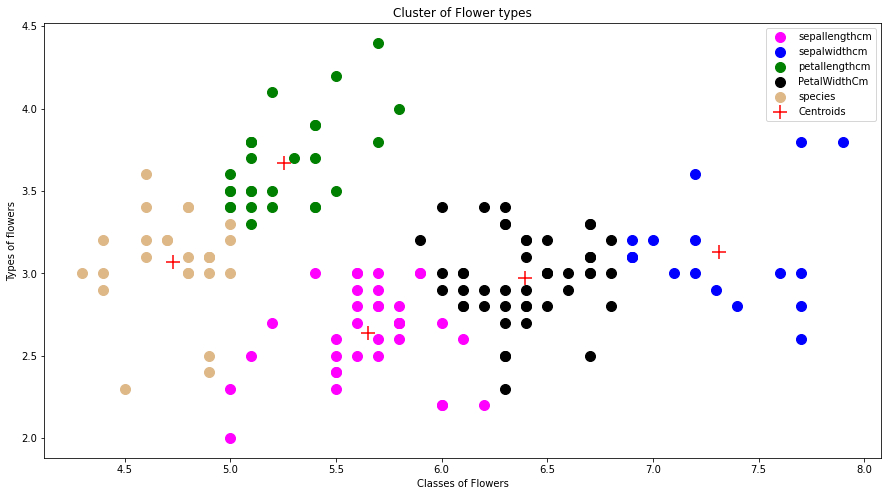

In [37]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='sepallengthcm')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='sepalwidthcm')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='petallengthcm')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='black',label='PetalWidthCm')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='species')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids',marker = "+")
plt.title('Cluster of Flower types')
plt.xlabel('Classes of Flowers')
plt.ylabel('Types of flowers')
plt.legend()
plt.show()


In [38]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

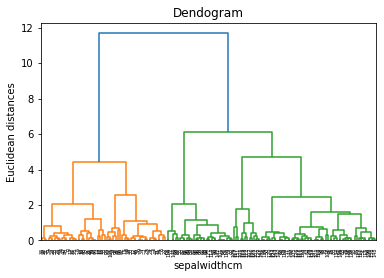

In [39]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('sepalwidthcm')
plt.ylabel('Euclidean distances')
plt.show()

### Fitting Hierarchical clustering to data

In [40]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [41]:
y_hc

array([4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 0, 0, 4,
       4, 0, 4, 0, 4, 4, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 3, 1, 1, 3, 0, 3, 1, 3,
       1, 1, 1, 2, 2, 1, 1, 3, 3, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int64)

### Visualizing the cluster

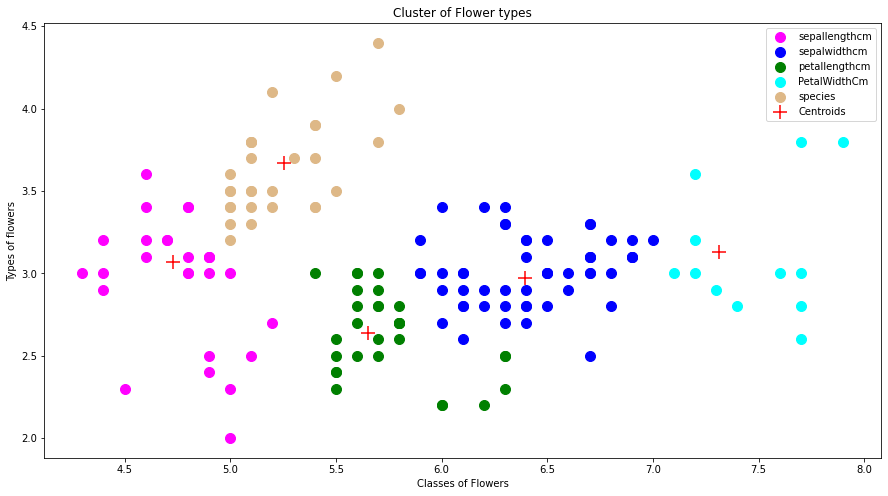

In [42]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='magenta',label='sepallengthcm')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='sepalwidthcm')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='petallengthcm')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='PetalWidthCm')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='burlywood',label='species')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids',marker = "+")
plt.title('Cluster of Flower types')
plt.xlabel('Classes of Flowers')
plt.ylabel('Types of flowers')
plt.legend()
plt.ioff()
plt.show()

In [43]:
X_ = iris.iloc[:,3:].values
print("sepalwidthcm",X_[:,0])#width
print("sepallengthcm",X_[:,1])#length

sepalwidthcm [1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.0 1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.5 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.0
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.0 4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.0
 4.9 4.7 4.3 4.4 4.8 5.0 4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.0
 4.4 4.6 4.0 3.3 4.2 4.2 4.2 4.3 3.0 4.1 6.0 5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.0 5.1 5.3 5.5 6.7 6.9 5.0 5.7 4.9 6.7 4.9 5.7 6.0
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.0 5.2 5.4 5.1]
sepallengthcm [0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.0 1.3 1.4 1.0 1.5 1.0 1.4 1.3 1.4 1.5 1.0 1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.0 1.1 1.0 1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.

In [44]:
X = iris.iloc[:, [1, 5]].values


In [45]:
iris.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
iris.tail(5)

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [47]:
iris.species.isnull().sum()

0

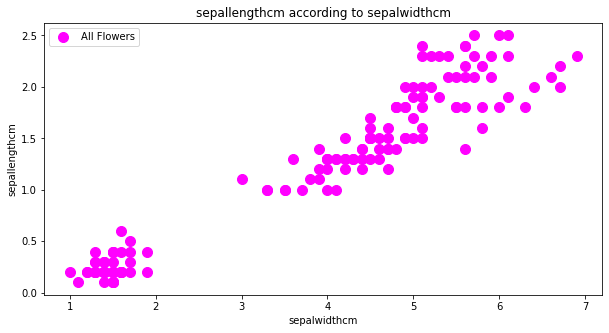

In [48]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X_[:,0],X_[:,1],s=100,c='magenta',label='All Flowers')
plt.title('sepallengthcm according to sepalwidthcm')
plt.xlabel('sepalwidthcm')
plt.ylabel('sepallengthcm')
plt.legend()
plt.show()

### K - Means Clustering

In [49]:
type(iris)

pandas.core.frame.DataFrame

In [50]:
X_test = iris.iloc[:,0:4]

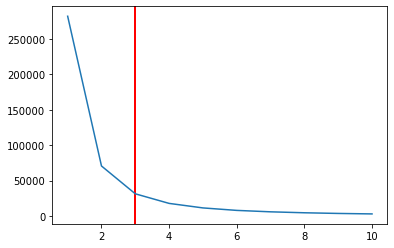

In [51]:
wcss_2 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(X_test)
    wcss_2.append(kmeans.inertia_)
    plt.axvline(3,color='red')

plt.plot(range(1,11),wcss_2)

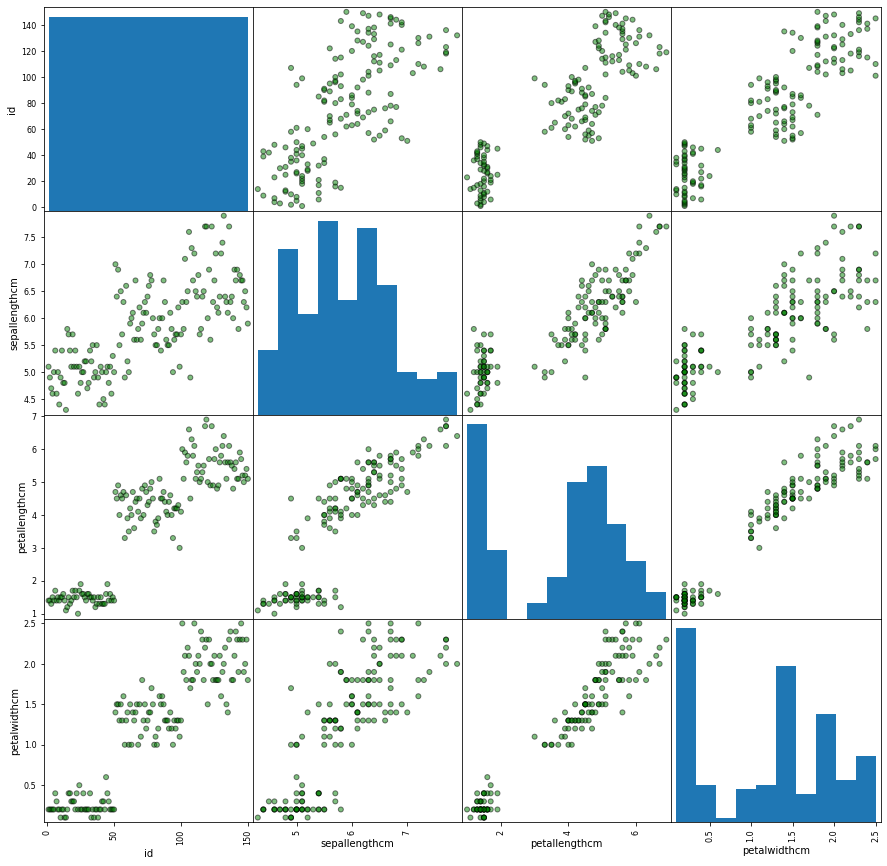

In [52]:
def color_generate():
    colors=[]
    for i in iris.loc[:,'sepalwidthcm']:
        if i=='Abnormal':
            colors.append('red')
        else:
            colors.append('green')
    return colors
        
pd.plotting.scatter_matrix(iris.loc[:, iris.columns != 'sepalwidthcm'],
                                       c=color_generate(),
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 100,
                                       edgecolor= "black")
plt.show()

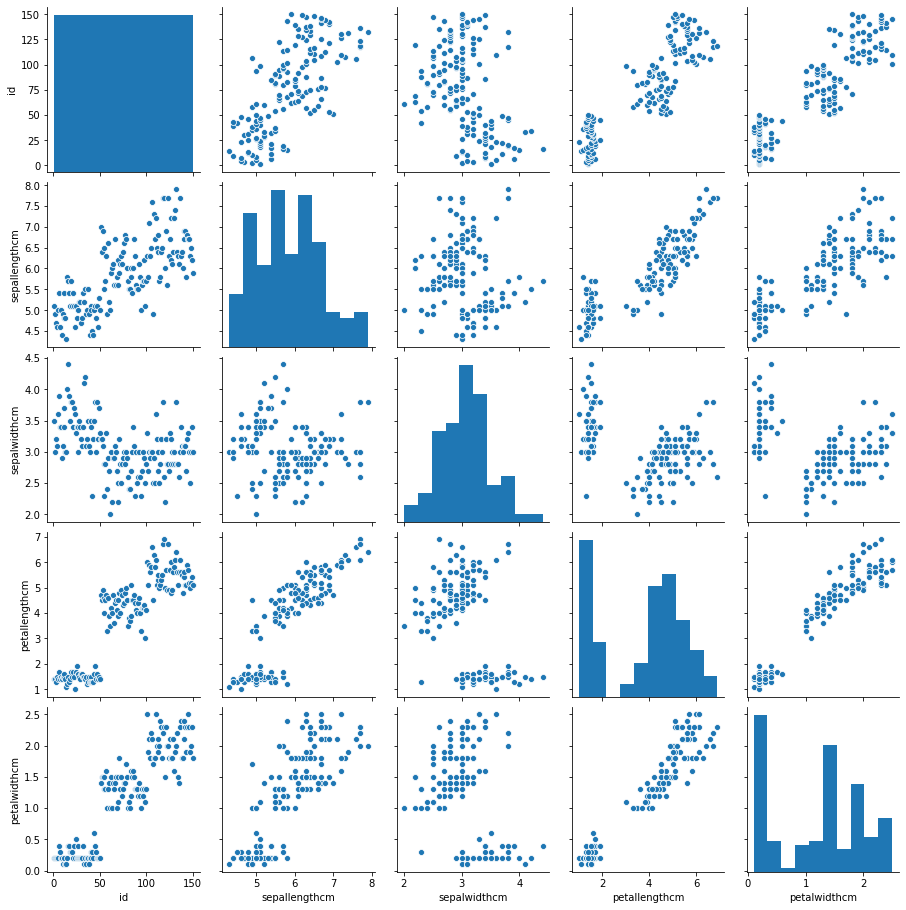

In [53]:
sns.pairplot(iris)

### In this visual, showing relations between columns with different details